In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
#
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
#
from tensorflow.keras.optimizers import Adam





In [19]:
data = pd.read_csv('Data/Cancer.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
del data['Unnamed: 32']
del data['id']
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


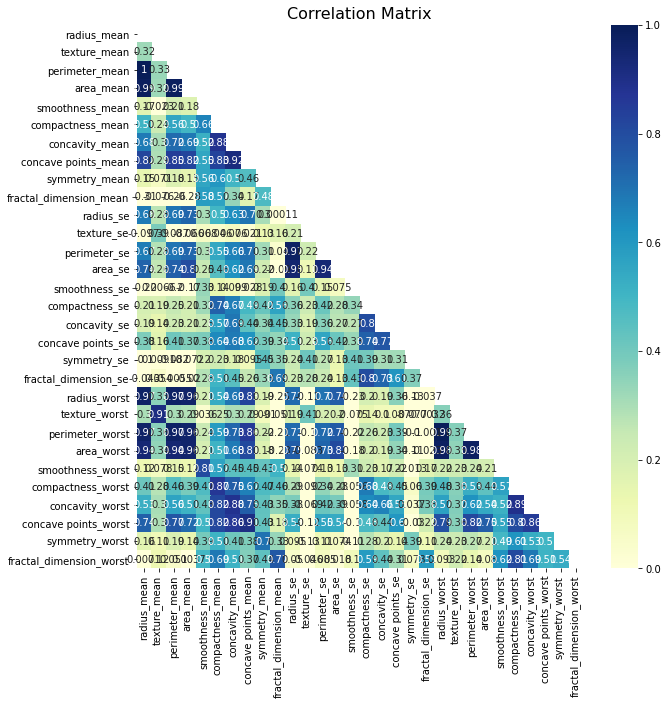

In [22]:
def corr_matrix(dataframe):
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize = (10, 10))  
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax,
                mask=mask,
                data=corr, 
                annot=True,
                cmap="YlGnBu",
                robust=True,
               vmin=0,
               vmax=1)
    ax.set_title('Correlation Matrix', fontsize = 16)
    plt.show()
corr_matrix(data)

In [23]:
df = data

In [24]:
corr = data.corr()
corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


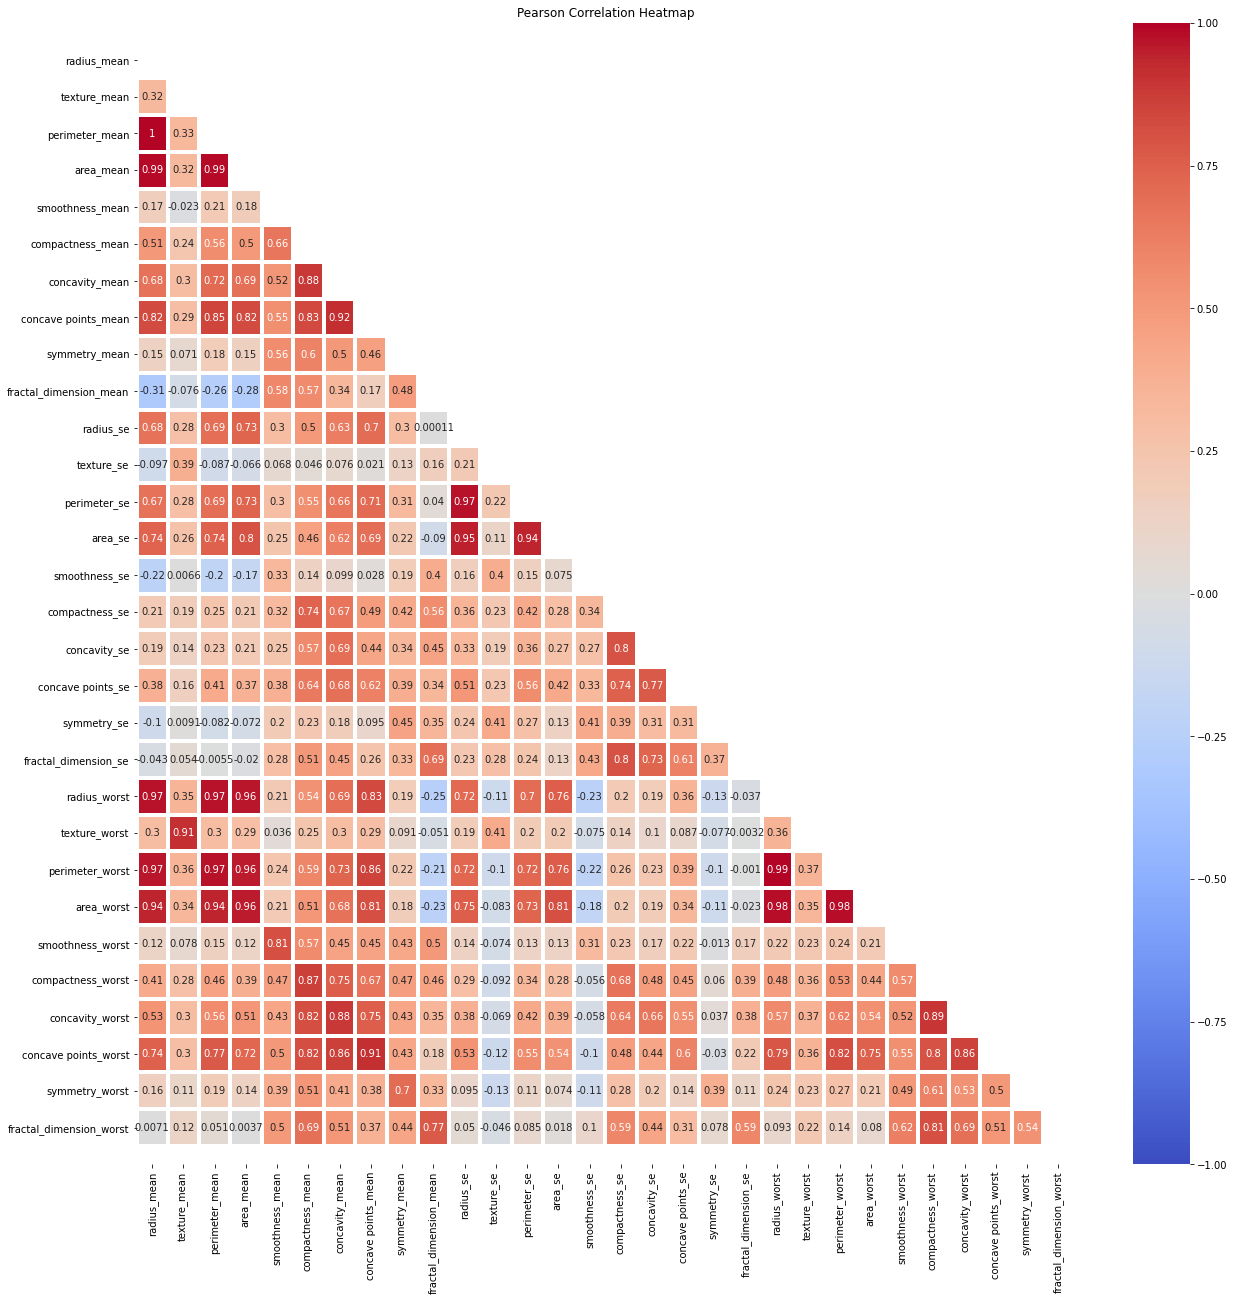

In [25]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(21,21))
plt.title("Pearson Correlation Heatmap")
corr = df.corr(method='pearson')
#mask = np.tril(df.corr())
sns.heatmap(corr,
            mask=mask,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot = True, # to show the correlation degree on cell
           vmin=-1,
           vmax=1,
           center= 0,
           fmt='0.2g', #
           cmap= 'coolwarm',
           linewidths=3, # cells partioning line width
           linecolor='white', # for spacing line color between cells
           square=False,#to make cells square 
           cbar_kws= {'orientation': 'vertical'}
           )

b, t = plt.ylim() 
b += 0.5  
t -= 0.5  
plt.ylim(b,t) 
plt.show()



In [26]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
y=data['diagnosis']
data.drop(['diagnosis'],axis=1,inplace=True)
x=data
y = y.replace({'M':0,'B':1})
print(x.shape,y.shape)


(569, 30) (569,)


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, stratify=y)

In [44]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(455, 30) (114, 30) (455,) (114,)


In [45]:
print(y_train.value_counts())
print(y_test.value_counts())

1    285
0    170
Name: diagnosis, dtype: int64
1    72
0    42
Name: diagnosis, dtype: int64


## RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
RandomForestClassifierScore = Random_Forest.score(x_test,y_test)

In [47]:
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 94.73684210526315


## K-Nearest Neighbor


In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(42)
KNN.fit(x_train,y_train)
KNeighborsClassifierScore = KNN.score(x_test,y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 92.10526315789474


In [51]:
KNN.fit(x_train,y_train)
KNeighborsClassifierScore = KNN.score(x_test,y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 92.10526315789474


## Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
DTreeClassifier = DecisionTreeClassifier()
DTreeClassifier.fit(x_train,y_train)
DecisionTreeClassifierScore =DTreeClassifier.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)


Accuracy obtained by Decision Tree Classifier model: 92.98245614035088


## Red Neuronal

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_entrada (InputLayer)    [(None, 30)]              0         
_________________________________________________________________
activation_3 (Activation)    (None, 30)                0         
_________________________________________________________________
primera_capa_oculta (Dense)  (None, 10)                310       
_________________________________________________________________
segunda_capa_oculta (Dense)  (None, 10)                110       
_________________________________________________________________
capa_salida (Dense)          (None, 1)                 11        
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


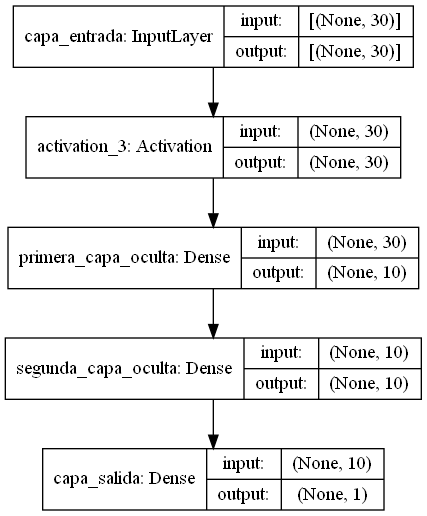

In [96]:
model.summary()
plot_model(model,show_shapes=True)

In [107]:
inputs = Input(shape=(x_train.shape[1],),name='capa_entrada')
x = Activation('relu')(inputs)
x = Dense(16, activation='relu',name='primera_capa_oculta')(x)
x= Dropout(0.1)(x)
x = Dense(16, activation='relu',name='segunda_capa_oculta')(x)
x= Dropout(0.1)(x)
outputs = Dense(1, activation='sigmoid', name='capa_salida')(x)
model = Model(inputs=inputs, outputs=outputs)



In [108]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
model.fit(X_train, y_train, batch_size=100, epochs=150,verbose=2)


Epoch 1/150
5/5 - 0s - loss: 0.0380 - accuracy: 0.9890
Epoch 2/150
5/5 - 0s - loss: 0.0366 - accuracy: 0.9890
Epoch 3/150
5/5 - 0s - loss: 0.0472 - accuracy: 0.9824
Epoch 4/150
5/5 - 0s - loss: 0.0335 - accuracy: 0.9890
Epoch 5/150
5/5 - 0s - loss: 0.0362 - accuracy: 0.9868
Epoch 6/150
5/5 - 0s - loss: 0.0263 - accuracy: 0.9912
Epoch 7/150
5/5 - 0s - loss: 0.0239 - accuracy: 0.9934
Epoch 8/150
5/5 - 0s - loss: 0.0307 - accuracy: 0.9934
Epoch 9/150
5/5 - 0s - loss: 0.0384 - accuracy: 0.9912
Epoch 10/150
5/5 - 0s - loss: 0.0435 - accuracy: 0.9846
Epoch 11/150
5/5 - 0s - loss: 0.0314 - accuracy: 0.9890
Epoch 12/150
5/5 - 0s - loss: 0.0305 - accuracy: 0.9934
Epoch 13/150
5/5 - 0s - loss: 0.0268 - accuracy: 0.9912
Epoch 14/150
5/5 - 0s - loss: 0.0311 - accuracy: 0.9934
Epoch 15/150
5/5 - 0s - loss: 0.0359 - accuracy: 0.9890
Epoch 16/150
5/5 - 0s - loss: 0.0333 - accuracy: 0.9912
Epoch 17/150
5/5 - 0s - loss: 0.0265 - accuracy: 0.9934
Epoch 18/150
5/5 - 0s - loss: 0.0408 - accuracy: 0.9868
E

In [113]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets